# Predict the Price of the House based on various features

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
from sklearn.datasets import load_boston

In [3]:
dataset= load_boston()

In [4]:
dataset

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

## Convert this data into a DataFrame

In [5]:
df= pd.DataFrame(dataset.data)

In [6]:
df

0     1      2    3      4      5     6       7    8      9    10  \
0    0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900  1.0  296.0  15.3   
1    0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671  2.0  242.0  17.8   
2    0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671  2.0  242.0  17.8   
3    0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622  3.0  222.0  18.7   
4    0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622  3.0  222.0  18.7   
..       ...   ...    ...  ...    ...    ...   ...     ...  ...    ...   ...   
501  0.06263   0.0  11.93  0.0  0.573  6.593  69.1  2.4786  1.0  273.0  21.0   
502  0.04527   0.0  11.93  0.0  0.573  6.120  76.7  2.2875  1.0  273.0  21.0   
503  0.06076   0.0  11.93  0.0  0.573  6.976  91.0  2.1675  1.0  273.0  21.0   
504  0.10959   0.0  11.93  0.0  0.573  6.794  89.3  2.3889  1.0  273.0  21.0   
505  0.04741   0.0  11.93  0.0  0.573  6.030  80.8  2.5050  1.0  273.0  21.0   

         11    12  
0    396.90  4.98  
1    396.90  9.14  
2    392.83  4.03  
3    394.63  2.94  
4    396.90  5.33  
..      ...   ...  
501  391.99  9.67  
502  396.90  9.08  
503  396.90  5.64  
504  393.45  6.48  
505  396.90  7.88  

[506 rows x 13 columns]

## Assign the feature names to the dataframe columns

In [7]:
df.columns = dataset.feature_names

In [8]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  
0     15.3  396.90   4.98  
1     17.8  396.90   9.14  
2     17.8  392.83   4.03  
3     18.7  394.63   2.94  
4     18.7  396.90   5.33

In [9]:
df.shape

(506, 13)

### Assign the dataset target to the dataframe price

In [12]:
df["Price"] = dataset.target
df["Price"]

0      24.0
1      21.6
2      34.7
3      33.4
4      36.2
       ... 
501    22.4
502    20.6
503    23.9
504    22.0
505    11.9
Name: Price, Length: 506, dtype: float64

In [13]:
df.head()

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  Price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [14]:
X = df.iloc[:,:-1]  #Independent features
y = df.iloc[:,-1]  #Dependent features

# Linear Regression

In [15]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [16]:
regr= LinearRegression()

In [17]:
mse=cross_val_score(regr, X, y, scoring= "neg_mean_squared_error", cv=5)
mse

array([-12.46030057, -26.04862111, -33.07413798, -80.76237112,
       -33.31360656])

In [18]:
mean_mse= np.mean(mse)
mean_mse

-37.13180746769913

# Ridge Regression

In [19]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [20]:
ridge= Ridge()
param_grid= {"alpha": [1e-15,1e-10, 1e-8, 1e-3,56,20,100,40,29]}
model= GridSearchCV(ridge,param_grid, scoring= "neg_mean_squared_error", cv=5)
model.fit(X,y)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.001, 56, 20, 100, 40,
                                   29]},
             scoring='neg_mean_squared_error')

In [21]:
#find minimum squared error
model.best_score_

-29.90570194754033

In [22]:
#find the best parameter for alpha
model.best_params_

{'alpha': 100}

# Lasso Regression

In [23]:
from sklearn.linear_model import Lasso

In [24]:
lasso= Lasso()
param_grid= {"alpha": [1e-15,1e-10, 1e-8,1e-2,1e-1, 1e-3,56,20,100,40,29]}
model1= GridSearchCV(lasso,param_grid, scoring= "neg_mean_squared_error", cv=5)
model1.fit(X,y)

C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4633.382878207054, tolerance: 3.919148542079209
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 3763.7513265314064, tolerance: 3.3071316790123473
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 4209.722674195946, tolerance: 2.813643886419753
  model = cd_fast.enet_coordinate_descent(
C:\Users\user\anaconda3\lib\site-packages\sklearn\linear_model\_coordinate_descent.py:529: ConvergenceWarning:

GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 0.01, 0.1, 0.001, 56,
                                   20, 100, 40, 29]},
             scoring='neg_mean_squared_error')

In [25]:
model1.best_params_

{'alpha': 0.1}

In [26]:
model1.best_score_

-34.83043231820267

In [27]:
from sklearn.model_selection import train_test_split

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [29]:
prediction_ridge= model.predict(X_test)
prediction_lasso= model1.predict(X_test)

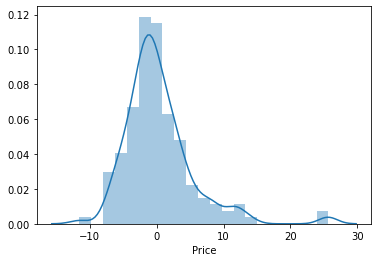

In [30]:
import seaborn as sns
sns.distplot(y_test- prediction_lasso)

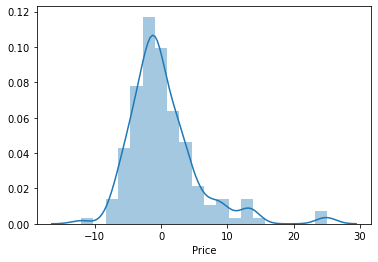

In [31]:
sns.distplot(y_test- prediction_ridge)

# It can be seen that Ridge regression gives a good prediction